In [2]:
import gym
from gym.wrappers import Monitor
import itertools
import numpy as np
import os
import random
import sys
import psutil
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from SER import StateProcessor, Estimator, ModelParametersCopier, make_epsilon_greedy_policy, deep_q_learning

from reinforcementlearning.lib import plotting
from collections import deque, namedtuple

env = gym.envs.make("Breakout-v0")

VALID_ACTIONS = [0, 1, 2, 3]

# training
tf.reset_default_graph()

# Where we save our checkpoints and graphs
experiment_dir = os.path.abspath("./experiments_ser128/{}".format(env.spec.id))

# Create a glboal step variable
global_step = tf.Variable(0, name='global_step', trainable=False)

# Create estimators
q_estimator = Estimator(scope="q_estimator", summaries_dir=experiment_dir)
target_estimator = Estimator(scope="target_q")

# State processor
state_processor = StateProcessor()

results = []

# Run it!
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t, stats in deep_q_learning(sess,
                                    env,
                                    q_estimator=q_estimator,
                                    target_estimator=target_estimator,
                                    state_processor=state_processor,
                                    experiment_dir=experiment_dir,
                                    num_episodes=10000,
                                    replay_memory_size=500000,
                                    replay_memory_init_size=50000,
                                    update_target_estimator_every=10000,
                                    epsilon_start=1.0,
                                    epsilon_end=0.1,
                                    epsilon_decay_steps=500000,
                                    discount_factor=0.99,
                                    batch_size=40,
                                    ser_coef=128):
        results.append(stats.episode_rewards[-1])
        print("\nEpisode Reward: {}".format(stats.episode_rewards[-1]))




Instructions for updating:
Use `tf.cast` instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Please switch to tf.train.get_global_step
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor







Populating replay memory...


Copied model parameters to target network.
Step 174 (174) @ Episode 1/10000, loss: 0.0009155137231573462WARNING:tensorflow:From /Users/aydarakhmetzyanov/Documents/secondary_experience_replay/SER.py:245: The name tf.Summary is 

Step 414 (10137) @ Episode 42/10000, loss: 0.02443227358162403059
Episode Reward: 4.0
Step 474 (10611) @ Episode 43/10000, loss: 0.00012524919293355197
Episode Reward: 5.0
Step 213 (10824) @ Episode 44/10000, loss: 0.02424539998173713764
Episode Reward: 1.0
Step 175 (10999) @ Episode 45/10000, loss: 5.03250521433074e-0527
Episode Reward: 0.0
Step 164 (11163) @ Episode 46/10000, loss: 0.00013264376320876184
Episode Reward: 0.0
Step 169 (11332) @ Episode 47/10000, loss: 0.00019939285994041717
Episode Reward: 0.0
Step 179 (11511) @ Episode 48/10000, loss: 8.419596997555345e-055
Episode Reward: 0.0
Step 238 (11749) @ Episode 49/10000, loss: 0.00016322739247698337
Episode Reward: 1.0
Step 227 (11976) @ Episode 50/10000, loss: 0.00017790545825846493
Episode Reward: 1.0
Step 168 (12144) @ Episode 51/10000, loss: 0.00011684335913741961
Episode Reward: 0.0
Step 178 (12322) @ Episode 52/10000, loss: 0.02349364757537841814
Episode Reward: 0.0
Step 276 (12598) @ Episode 53/10000, loss: 0.000367508

Step 161 (31248) @ Episode 134/10000, loss: 0.00458779651671648734
Episode Reward: 0.0
Step 238 (31486) @ Episode 135/10000, loss: 5.9366448112996295e-05
Episode Reward: 1.0
Step 177 (31663) @ Episode 136/10000, loss: 0.00072350475238636143
Episode Reward: 0.0
Step 167 (31830) @ Episode 137/10000, loss: 0.00029712094692513347
Episode Reward: 0.0
Step 307 (32137) @ Episode 138/10000, loss: 0.00049456133274361495
Episode Reward: 2.0
Step 270 (32407) @ Episode 139/10000, loss: 0.00446560513228178285
Episode Reward: 1.0
Step 174 (32581) @ Episode 140/10000, loss: 0.00095371232600882655
Episode Reward: 0.0
Step 181 (32762) @ Episode 141/10000, loss: 0.00089173857122659687
Episode Reward: 0.0
Step 297 (33059) @ Episode 142/10000, loss: 0.00031330864294432104
Episode Reward: 2.0
Step 228 (33287) @ Episode 143/10000, loss: 0.00020746844529639934
Episode Reward: 1.0
Step 178 (33465) @ Episode 144/10000, loss: 0.00139623903669416937
Episode Reward: 0.0
Step 171 (33636) @ Episode 145/10000, loss:

Step 229 (52558) @ Episode 225/10000, loss: 0.00034890123060904443
Episode Reward: 1.0
Step 309 (52867) @ Episode 226/10000, loss: 0.00385301234200596814
Episode Reward: 3.0
Step 163 (53030) @ Episode 227/10000, loss: 0.00016237997624557465
Episode Reward: 0.0
Step 176 (53206) @ Episode 228/10000, loss: 0.00064334610942751178
Episode Reward: 0.0
Step 299 (53505) @ Episode 229/10000, loss: 0.00056380347814410923
Episode Reward: 2.0
Step 266 (53771) @ Episode 230/10000, loss: 0.00012937180872540924
Episode Reward: 2.0
Step 283 (54054) @ Episode 231/10000, loss: 0.00028224100242368877
Episode Reward: 3.0
Step 213 (54267) @ Episode 232/10000, loss: 0.00114334037061780777
Episode Reward: 1.0
Step 242 (54509) @ Episode 233/10000, loss: 0.00057721650227904322
Episode Reward: 1.0
Step 165 (54674) @ Episode 234/10000, loss: 0.00056604325072839864
Episode Reward: 0.0
Step 167 (54841) @ Episode 235/10000, loss: 0.00032388599356636405
Episode Reward: 0.0
Step 180 (55021) @ Episode 236/10000, loss:

Step 218 (75383) @ Episode 316/10000, loss: 0.00256956438533961773
Episode Reward: 1.0
Step 220 (75603) @ Episode 317/10000, loss: 0.00013601969112642113
Episode Reward: 1.0
Step 231 (75834) @ Episode 318/10000, loss: 0.00010983932588715106
Episode Reward: 1.0
Step 400 (76234) @ Episode 319/10000, loss: 0.00052384939044713974
Episode Reward: 4.0
Step 236 (76470) @ Episode 320/10000, loss: 0.00025214796187356114
Episode Reward: 1.0
Step 244 (76714) @ Episode 321/10000, loss: 0.00078502652468159872
Episode Reward: 1.0
Step 229 (76943) @ Episode 322/10000, loss: 0.00026752791018225258
Episode Reward: 1.0
Step 212 (77155) @ Episode 323/10000, loss: 8.295470615848899e-054
Episode Reward: 1.0
Step 379 (77534) @ Episode 324/10000, loss: 0.00052709085866808892
Episode Reward: 4.0
Step 167 (77701) @ Episode 325/10000, loss: 0.00036753405584022403
Episode Reward: 0.0
Step 320 (78021) @ Episode 326/10000, loss: 0.00041081695235334337
Episode Reward: 3.0
Step 171 (78192) @ Episode 327/10000, loss:

Step 261 (98082) @ Episode 407/10000, loss: 0.00017490561003796756
Episode Reward: 2.0
Step 178 (98260) @ Episode 408/10000, loss: 0.00011174117389600724
Episode Reward: 0.0
Step 253 (98513) @ Episode 409/10000, loss: 0.00050987757276743657
Episode Reward: 1.0
Step 179 (98692) @ Episode 410/10000, loss: 0.00129669462330639364
Episode Reward: 0.0
Step 285 (98977) @ Episode 411/10000, loss: 0.00014073065540287644
Episode Reward: 3.0
Step 286 (99263) @ Episode 412/10000, loss: 0.00016284899902530015
Episode Reward: 2.0
Step 238 (99501) @ Episode 413/10000, loss: 0.00028810094227083035
Episode Reward: 1.0
Step 223 (99724) @ Episode 414/10000, loss: 0.00177795870695263154
Episode Reward: 1.0
Step 233 (99957) @ Episode 415/10000, loss: 0.00021013373043388128
Episode Reward: 1.0
Step 42 (99999) @ Episode 416/10000, loss: 0.00065044465009123096
Copied model parameters to target network.
Step 236 (100193) @ Episode 416/10000, loss: 0.00165810086764395245
Episode Reward: 1.0
Step 242 (100435) @ 

Step 404 (119165) @ Episode 497/10000, loss: 0.00012959432206116617
Episode Reward: 4.0
Step 204 (119369) @ Episode 498/10000, loss: 0.00012154696742072701
Episode Reward: 1.0
Step 267 (119636) @ Episode 499/10000, loss: 0.00022594971233047545
Episode Reward: 2.0
Step 192 (119828) @ Episode 500/10000, loss: 0.00074001925531774763
Episode Reward: 0.0
Step 171 (119999) @ Episode 501/10000, loss: 0.00189768825657665735
Copied model parameters to target network.
Step 230 (120058) @ Episode 501/10000, loss: 0.0040989303961396225
Episode Reward: 1.0
Step 219 (120277) @ Episode 502/10000, loss: 0.00231914734467864046
Episode Reward: 1.0
Step 175 (120452) @ Episode 503/10000, loss: 0.00147948798257857565
Episode Reward: 0.0
Step 204 (120656) @ Episode 504/10000, loss: 0.00100505608133971755
Episode Reward: 1.0
Step 172 (120828) @ Episode 505/10000, loss: 0.00035014568129554395
Episode Reward: 0.0
Step 230 (121058) @ Episode 506/10000, loss: 0.00156390515621751556
Episode Reward: 1.0
Step 290 (

Step 269 (140984) @ Episode 586/10000, loss: 0.00071574922185391198
Episode Reward: 2.0
Step 343 (141327) @ Episode 587/10000, loss: 0.00203977222554385667
Episode Reward: 3.0
Step 287 (141614) @ Episode 588/10000, loss: 0.00103078666143119347
Episode Reward: 2.0
Step 185 (141799) @ Episode 589/10000, loss: 0.00085345358820632137
Episode Reward: 0.0
Step 350 (142149) @ Episode 590/10000, loss: 0.00227348064072430134
Episode Reward: 3.0
Step 325 (142474) @ Episode 591/10000, loss: 0.00084058876382187014
Episode Reward: 3.0
Step 167 (142641) @ Episode 592/10000, loss: 0.00055804202565923336
Episode Reward: 0.0
Step 278 (142919) @ Episode 593/10000, loss: 0.00077072792919352656
Episode Reward: 2.0
Step 228 (143147) @ Episode 594/10000, loss: 0.00059372093528509146
Episode Reward: 1.0
Step 170 (143317) @ Episode 595/10000, loss: 0.00049710366874933244
Episode Reward: 0.0
Step 356 (143673) @ Episode 596/10000, loss: 0.00062799366423860194
Episode Reward: 3.0
Step 276 (143949) @ Episode 597/

Step 274 (163777) @ Episode 676/10000, loss: 0.00805259495973587925
Episode Reward: 2.0
Step 283 (164060) @ Episode 677/10000, loss: 0.00050706381443887955
Episode Reward: 2.0
Step 235 (164295) @ Episode 678/10000, loss: 0.00141005893237888815
Episode Reward: 1.0
Step 410 (164705) @ Episode 679/10000, loss: 0.00021843108697794378
Episode Reward: 4.0
Step 166 (164871) @ Episode 680/10000, loss: 0.00114196690265089275
Episode Reward: 0.0
Step 225 (165096) @ Episode 681/10000, loss: 0.00038807431701570756
Episode Reward: 1.0
Step 314 (165410) @ Episode 682/10000, loss: 0.00030152560793794696
Episode Reward: 2.0
Step 242 (165652) @ Episode 683/10000, loss: 0.00023869860160630196
Episode Reward: 1.0
Step 225 (165877) @ Episode 684/10000, loss: 0.00074467778904363518
Episode Reward: 1.0
Step 295 (166172) @ Episode 685/10000, loss: 0.00031837788992561435
Episode Reward: 2.0
Step 376 (166548) @ Episode 686/10000, loss: 0.00066789035918191085
Episode Reward: 3.0
Step 219 (166767) @ Episode 687/

Step 313 (186531) @ Episode 766/10000, loss: 0.00044368012459017336
Episode Reward: 2.0
Step 247 (186778) @ Episode 767/10000, loss: 0.00083894992712885146
Episode Reward: 1.0
Step 268 (187046) @ Episode 768/10000, loss: 0.00015957767027430236
Episode Reward: 2.0
Step 182 (187228) @ Episode 769/10000, loss: 0.00017601861327420927
Episode Reward: 0.0
Step 161 (187389) @ Episode 770/10000, loss: 0.00021091848611831665
Episode Reward: 0.0
Step 164 (187553) @ Episode 771/10000, loss: 0.00017701086471788585
Episode Reward: 0.0
Step 495 (188048) @ Episode 772/10000, loss: 0.00024863408179953694
Episode Reward: 5.0
Step 241 (188289) @ Episode 773/10000, loss: 0.00044875376624986534
Episode Reward: 2.0
Step 177 (188466) @ Episode 774/10000, loss: 0.00038250212674029179
Episode Reward: 0.0
Step 699 (189165) @ Episode 775/10000, loss: 0.00012135074939578772
Episode Reward: 9.0
Step 246 (189411) @ Episode 776/10000, loss: 0.00098282750695943836
Episode Reward: 1.0
Step 187 (189598) @ Episode 777/

Step 244 (208719) @ Episode 856/10000, loss: 0.00049385888269171125
Episode Reward: 1.0
Step 178 (208897) @ Episode 857/10000, loss: 0.00041883089579641823
Episode Reward: 0.0
Step 192 (209089) @ Episode 858/10000, loss: 0.00020380348723847425
Episode Reward: 0.0
Step 277 (209366) @ Episode 859/10000, loss: 0.00078653666423633787
Episode Reward: 2.0
Step 179 (209545) @ Episode 860/10000, loss: 0.00025438578450120986
Episode Reward: 0.0
Step 200 (209745) @ Episode 861/10000, loss: 0.00109454314224421985
Episode Reward: 0.0
Step 225 (209970) @ Episode 862/10000, loss: 0.00027661872445605695
Episode Reward: 1.0
Step 29 (209999) @ Episode 863/10000, loss: 0.00032946455758064985
Copied model parameters to target network.
Step 175 (210145) @ Episode 863/10000, loss: 0.00109525211155414585
Episode Reward: 0.0
Step 178 (210323) @ Episode 864/10000, loss: 0.00161726144142448954
Episode Reward: 0.0
Step 161 (210484) @ Episode 865/10000, loss: 0.00204132823273539546
Episode Reward: 0.0
Step 329 (

Step 206 (230090) @ Episode 945/10000, loss: 0.00096715707331895835
Episode Reward: 0.0
Step 207 (230297) @ Episode 946/10000, loss: 0.00054131413344293836
Episode Reward: 0.0
Step 171 (230468) @ Episode 947/10000, loss: 0.00098870974034070975
Episode Reward: 0.0
Step 234 (230702) @ Episode 948/10000, loss: 0.00369698787108063735
Episode Reward: 1.0
Step 170 (230872) @ Episode 949/10000, loss: 0.00113879214040935043
Episode Reward: 0.0
Step 171 (231043) @ Episode 950/10000, loss: 0.00053147354628890756
Episode Reward: 0.0
Step 249 (231292) @ Episode 951/10000, loss: 0.00089125859085470446
Episode Reward: 1.0
Step 173 (231465) @ Episode 952/10000, loss: 0.00130665802862495183
Episode Reward: 0.0
Step 227 (231692) @ Episode 953/10000, loss: 0.00085606629727408297
Episode Reward: 1.0
Step 171 (231863) @ Episode 954/10000, loss: 0.00075515994103625425
Episode Reward: 0.0
Step 303 (232166) @ Episode 955/10000, loss: 0.00045587279601022667
Episode Reward: 2.0
Step 246 (232412) @ Episode 956/

Step 467 (251324) @ Episode 1035/10000, loss: 0.00048031317419372594
Episode Reward: 4.0
Step 388 (251712) @ Episode 1036/10000, loss: 0.00215978617779910565
Episode Reward: 3.0
Step 306 (252018) @ Episode 1037/10000, loss: 0.00123936159070581275
Episode Reward: 2.0
Step 430 (252448) @ Episode 1038/10000, loss: 0.00133260758593678475
Episode Reward: 4.0
Step 172 (252620) @ Episode 1039/10000, loss: 0.00042487503378652036
Episode Reward: 0.0
Step 170 (252790) @ Episode 1040/10000, loss: 0.00322419661097228537
Episode Reward: 0.0
Step 299 (253089) @ Episode 1041/10000, loss: 0.00100723910145461563
Episode Reward: 2.0
Step 312 (253401) @ Episode 1042/10000, loss: 0.00068558275233954196
Episode Reward: 2.0
Step 313 (253714) @ Episode 1043/10000, loss: 0.00092165003297850496
Episode Reward: 2.0
Step 191 (253905) @ Episode 1044/10000, loss: 0.00060922984266653663
Episode Reward: 0.0
Step 371 (254276) @ Episode 1045/10000, loss: 0.00151451304554939276
Episode Reward: 4.0
Step 214 (254490) @ E

Step 314 (276086) @ Episode 1124/10000, loss: 0.00071016408037394296
Episode Reward: 2.0
Step 415 (276501) @ Episode 1125/10000, loss: 0.00084463990060612566
Episode Reward: 5.0
Step 169 (276670) @ Episode 1126/10000, loss: 0.00054459407692775135
Episode Reward: 0.0
Step 239 (276909) @ Episode 1127/10000, loss: 0.00284228497184813025
Episode Reward: 1.0
Step 228 (277137) @ Episode 1128/10000, loss: 0.00177700910717248925
Episode Reward: 1.0
Step 334 (277471) @ Episode 1129/10000, loss: 0.00210920535027980887
Episode Reward: 3.0
Step 375 (277846) @ Episode 1130/10000, loss: 0.00073048082413151865
Episode Reward: 4.0
Step 441 (278287) @ Episode 1131/10000, loss: 0.00082422082778066467
Episode Reward: 4.0
Step 191 (278478) @ Episode 1132/10000, loss: 0.00064072135137394074
Episode Reward: 0.0
Step 265 (278743) @ Episode 1133/10000, loss: 0.00159587210509926084
Episode Reward: 1.0
Step 219 (278962) @ Episode 1134/10000, loss: 0.00054807198466733177
Episode Reward: 1.0
Step 278 (279240) @ E

Step 312 (305430) @ Episode 1212/10000, loss: 0.00069561396958306432
Episode Reward: 3.0
Step 429 (305859) @ Episode 1213/10000, loss: 0.00237885303795337686
Episode Reward: 5.0
Step 330 (306189) @ Episode 1214/10000, loss: 0.00072290340904146437
Episode Reward: 3.0
Step 386 (306575) @ Episode 1215/10000, loss: 0.00090843799989670526
Episode Reward: 4.0
Step 347 (306922) @ Episode 1216/10000, loss: 0.00338646583259105745
Episode Reward: 4.0
Step 554 (307476) @ Episode 1217/10000, loss: 0.00232275086455047136
Episode Reward: 6.0
Step 291 (307767) @ Episode 1218/10000, loss: 0.00081949168816208843
Episode Reward: 2.0
Step 284 (308051) @ Episode 1219/10000, loss: 0.00111488858237862597
Episode Reward: 2.0
Step 313 (308364) @ Episode 1220/10000, loss: 0.00079515855759382254
Episode Reward: 2.0
Step 548 (308912) @ Episode 1221/10000, loss: 0.00094724958762526517
Episode Reward: 7.0
Step 434 (309346) @ Episode 1222/10000, loss: 0.00093242042930796745
Episode Reward: 5.0
Step 305 (309651) @ E

Step 414 (337822) @ Episode 1300/10000, loss: 0.00119487708434462556
Episode Reward: 3.0
Step 368 (338190) @ Episode 1301/10000, loss: 0.00327220116741955344
Episode Reward: 3.0
Step 388 (338578) @ Episode 1302/10000, loss: 0.00185758690349757676
Episode Reward: 4.0
Step 367 (338945) @ Episode 1303/10000, loss: 0.00063016387866809964
Episode Reward: 3.0
Step 366 (339311) @ Episode 1304/10000, loss: 0.00179015786852687695
Episode Reward: 4.0
Step 217 (339528) @ Episode 1305/10000, loss: 0.00243457546457648287
Episode Reward: 1.0
Step 456 (339984) @ Episode 1306/10000, loss: 0.00213522021658718664
Episode Reward: 6.0
Step 15 (339999) @ Episode 1307/10000, loss: 0.0015721467789262533
Copied model parameters to target network.
Step 429 (340413) @ Episode 1307/10000, loss: 0.0041601005941629415
Episode Reward: 7.0
Step 427 (340840) @ Episode 1308/10000, loss: 0.0015791759360581636
Episode Reward: 5.0
Step 418 (341258) @ Episode 1309/10000, loss: 0.00200503086671233184
Episode Reward: 5.0
St

Step 469 (378553) @ Episode 1387/10000, loss: 0.0026032738387584686
Episode Reward: 5.0
Step 671 (379224) @ Episode 1388/10000, loss: 0.0053212093189358714
Episode Reward: 9.0
Step 411 (379635) @ Episode 1389/10000, loss: 0.0019756902474910024
Episode Reward: 5.0
Step 364 (379999) @ Episode 1390/10000, loss: 0.0015467565972357988
Copied model parameters to target network.
Step 572 (380207) @ Episode 1390/10000, loss: 0.0031689205206930637
Episode Reward: 7.0
Step 696 (380903) @ Episode 1391/10000, loss: 0.0025885389186441975
Episode Reward: 11.0
Step 252 (381155) @ Episode 1392/10000, loss: 0.0026996787637472153
Episode Reward: 2.0
Step 445 (381600) @ Episode 1393/10000, loss: 0.0038708273787051444
Episode Reward: 6.0
Step 547 (382147) @ Episode 1394/10000, loss: 0.0049079162999987657
Episode Reward: 7.0
Step 556 (382703) @ Episode 1395/10000, loss: 0.0015102063771337272
Episode Reward: 7.0
Step 717 (383420) @ Episode 1396/10000, loss: 0.0008341573411598802
Episode Reward: 9.0
Step 405

Step 539 (434837) @ Episode 1472/10000, loss: 0.0098048290237784399
Episode Reward: 6.0
Step 846 (435683) @ Episode 1473/10000, loss: 0.0037377316039055586
Episode Reward: 15.0
Step 653 (436336) @ Episode 1474/10000, loss: 0.0025824371259659538
Episode Reward: 10.0
Step 902 (437238) @ Episode 1475/10000, loss: 0.0018755834316834807
Episode Reward: 16.0
Step 768 (438006) @ Episode 1476/10000, loss: 0.0021384425926953554
Episode Reward: 15.0
Step 909 (438915) @ Episode 1477/10000, loss: 0.0010404956992715597
Episode Reward: 23.0
Step 1069 (439984) @ Episode 1478/10000, loss: 0.0023577921092510223
Episode Reward: 24.0
Step 15 (439999) @ Episode 1479/10000, loss: 0.0040820525027811535
Copied model parameters to target network.
Step 919 (440903) @ Episode 1479/10000, loss: 0.0049704797565937048
Episode Reward: 22.0
Step 619 (441522) @ Episode 1480/10000, loss: 0.0065918201580643653
Episode Reward: 8.0
Step 895 (442417) @ Episode 1481/10000, loss: 0.0026228050701320175
Episode Reward: 18.0
S

Step 1289 (512152) @ Episode 1553/10000, loss: 0.0163921434432268147
Episode Reward: 28.0
Step 758 (512910) @ Episode 1554/10000, loss: 0.0038616999518126254
Episode Reward: 13.0
Step 911 (513821) @ Episode 1555/10000, loss: 0.0429050140082836155
Episode Reward: 19.0
Step 970 (514791) @ Episode 1556/10000, loss: 0.0032555747311562369
Episode Reward: 21.0
Step 609 (515400) @ Episode 1557/10000, loss: 0.0079911351203918465
Episode Reward: 10.0
Step 818 (516218) @ Episode 1558/10000, loss: 0.0226886235177516943
Episode Reward: 13.0
Step 1134 (517352) @ Episode 1559/10000, loss: 0.0044300416484475145
Episode Reward: 21.0
Step 1349 (518701) @ Episode 1560/10000, loss: 0.0027144760824739933
Episode Reward: 29.0
Step 1298 (519999) @ Episode 1561/10000, loss: 0.0026489978190511465
Copied model parameters to target network.
Step 1416 (520117) @ Episode 1561/10000, loss: 0.0016831562388688326
Episode Reward: 42.0
Step 981 (521098) @ Episode 1562/10000, loss: 0.0038303553592413664
Episode Reward:

Step 682 (597413) @ Episode 1634/10000, loss: 0.0019221814582124352
Episode Reward: 12.0
Step 657 (598070) @ Episode 1635/10000, loss: 0.0014899758389219642
Episode Reward: 10.0
Step 1247 (599317) @ Episode 1636/10000, loss: 0.00247520324774086485
Episode Reward: 26.0
Step 682 (599999) @ Episode 1637/10000, loss: 0.0019767540507018566
Copied model parameters to target network.
Step 1122 (600439) @ Episode 1637/10000, loss: 0.0036877698730677366
Episode Reward: 19.0
Step 1155 (601594) @ Episode 1638/10000, loss: 0.0070819430984556675
Episode Reward: 23.0
Step 1036 (602630) @ Episode 1639/10000, loss: 0.0016788436332717538
Episode Reward: 18.0
Step 1508 (604138) @ Episode 1640/10000, loss: 0.0027695633471012115
Episode Reward: 34.0
Step 1027 (605165) @ Episode 1641/10000, loss: 0.0017302155029028654
Episode Reward: 18.0
Step 1046 (606211) @ Episode 1642/10000, loss: 0.0084883514791727079
Episode Reward: 17.0
Step 1379 (607590) @ Episode 1643/10000, loss: 0.0022408491931855687
Episode Rew

Step 858 (679699) @ Episode 1715/10000, loss: 0.0014932194026187062
Episode Reward: 14.0
Step 300 (679999) @ Episode 1716/10000, loss: 0.0054189981892704962
Copied model parameters to target network.
Step 1224 (680923) @ Episode 1716/10000, loss: 0.0029944449197500944
Episode Reward: 23.0
Step 734 (681657) @ Episode 1717/10000, loss: 0.0042967810295522213
Episode Reward: 15.0
Step 1059 (682716) @ Episode 1718/10000, loss: 0.0024106397759169346
Episode Reward: 22.0
Step 1019 (683735) @ Episode 1719/10000, loss: 0.0013681527925655246
Episode Reward: 16.0
Step 785 (684520) @ Episode 1720/10000, loss: 0.0016901775961741805
Episode Reward: 12.0
Step 865 (685385) @ Episode 1721/10000, loss: 0.0290584508329629976
Episode Reward: 15.0
Step 1059 (686444) @ Episode 1722/10000, loss: 0.0133968535810709908
Episode Reward: 20.0
Step 1142 (687586) @ Episode 1723/10000, loss: 0.0027359973173588514
Episode Reward: 26.0
Step 1210 (688796) @ Episode 1724/10000, loss: 0.0010461814235895872
Episode Reward

Step 916 (760610) @ Episode 1795/10000, loss: 0.0084247263148427015
Episode Reward: 20.0
Step 950 (761560) @ Episode 1796/10000, loss: 0.0033436431549489566
Episode Reward: 16.0
Step 987 (762547) @ Episode 1797/10000, loss: 0.0034669197630137205
Episode Reward: 23.0
Step 1580 (764127) @ Episode 1798/10000, loss: 0.0041090254671871669
Episode Reward: 38.0
Step 1130 (765257) @ Episode 1799/10000, loss: 0.0018393928185105324
Episode Reward: 24.0
Step 1062 (766319) @ Episode 1800/10000, loss: 0.0050334227271378046
Episode Reward: 26.0
Step 830 (767149) @ Episode 1801/10000, loss: 0.0034732979256659746
Episode Reward: 19.0
Step 918 (768067) @ Episode 1802/10000, loss: 0.0036747984122484922
Episode Reward: 20.0
Step 1121 (769188) @ Episode 1803/10000, loss: 0.0085425060242414477
Episode Reward: 27.0
Step 811 (769999) @ Episode 1804/10000, loss: 0.0010830946266651154
Copied model parameters to target network.
Step 993 (770181) @ Episode 1804/10000, loss: 0.0114474268630146987
Episode Reward: 

Step 914 (846508) @ Episode 1876/10000, loss: 0.0072206915356218815
Episode Reward: 23.0
Step 1299 (847807) @ Episode 1877/10000, loss: 0.0149205010384321216
Episode Reward: 30.0
Step 1254 (849061) @ Episode 1878/10000, loss: 0.0078716678544878964
Episode Reward: 27.0
Step 938 (849999) @ Episode 1879/10000, loss: 0.0025603431276977062
Copied model parameters to target network.
Step 1260 (850321) @ Episode 1879/10000, loss: 0.0135816885158419613
Episode Reward: 23.0
Step 978 (851299) @ Episode 1880/10000, loss: 0.0037612752057611942
Episode Reward: 23.0
Step 1057 (852356) @ Episode 1881/10000, loss: 0.0064036822877824313
Episode Reward: 25.0
Step 1194 (853550) @ Episode 1882/10000, loss: 0.0038378234021365643
Episode Reward: 23.0
Step 910 (854460) @ Episode 1883/10000, loss: 0.0073105311021208764
Episode Reward: 21.0
Step 1091 (855551) @ Episode 1884/10000, loss: 0.0052929609082639225
Episode Reward: 17.0
Step 1009 (856560) @ Episode 1885/10000, loss: 0.0054805437102913862
Episode Rewar

Step 719 (932538) @ Episode 1956/10000, loss: 0.0381977409124374485
Episode Reward: 15.0
Step 790 (933328) @ Episode 1957/10000, loss: 0.0057833031751215466
Episode Reward: 17.0
Step 984 (934312) @ Episode 1958/10000, loss: 0.0026305085048079497
Episode Reward: 17.0
Step 723 (935035) @ Episode 1959/10000, loss: 0.0034573555458337074
Episode Reward: 14.0
Step 1084 (936119) @ Episode 1960/10000, loss: 0.0469688549637794588
Episode Reward: 24.0
Step 978 (937097) @ Episode 1961/10000, loss: 0.0024473376106470823
Episode Reward: 20.0
Step 1411 (938508) @ Episode 1962/10000, loss: 0.0040070144459605226
Episode Reward: 23.0
Step 997 (939505) @ Episode 1963/10000, loss: 0.0040412773378193386
Episode Reward: 23.0
Step 494 (939999) @ Episode 1964/10000, loss: 0.0017068965826183558
Copied model parameters to target network.
Step 875 (940380) @ Episode 1964/10000, loss: 0.0088702207431197175
Episode Reward: 16.0
Step 691 (941071) @ Episode 1965/10000, loss: 0.0043635279871523384
Episode Reward: 10

KeyboardInterrupt: 

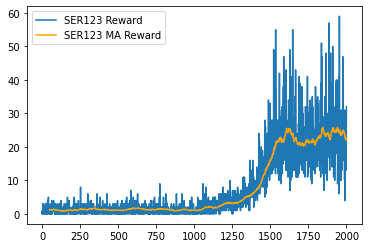

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Reward':  stats.episode_rewards}
df = pd.DataFrame (data)

rolling_mean = df.Reward.rolling(window=50).mean()

plt.plot(df.index, df.Reward, label='SER123 Reward')
plt.plot(df.index, rolling_mean, label='SER123 MA Reward', color='orange')
plt.legend(loc='upper left')
plt.show()
df.to_csv('output_SER128.csv', index=False)  